In [1]:
import re
import string
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
df = pd.read_excel("D:\\tweets_live.xlsx")

In [3]:
df

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen
0,@amvtious,2024-01-13T10:50:22.000Z,PREMIUM ACCOUNT FOR SALE PH \n\n Canv...,11.0,283.0,286,3 rb,0.0
1,@yerimyqueen,2024-01-13T01:09:28.000Z,PREMIUM ACCOUNTS \n\n NETLIFX\n SPOTIFY\n DIS...,9.0,468.0,459,4 rb,0.0
2,@adorableruto,2024-01-13T05:26:26.000Z,mau disney+ #zonauang,76.0,2.0,2,358,0.0
3,@pawkchoi,2024-01-12T07:29:21.000Z,disney harian dong #zonauang,82.0,3.0,3,791,0.0
4,@pacarpedriG,2024-01-13T01:59:35.000Z,mau disney plus dong #zonauangᅠᅠ,23.0,3.0,3,346,0.0
...,...,...,...,...,...,...,...,...
57,@kimi_ckey0521,2024-01-13T04:07:41.000Z,テ・フィティに会える唯一の場所,1.0,145.0,3 rb,111 rb,0.0
58,@justcatchmedemi,2024-01-13T01:06:15.000Z,Disney Channel gave us Demi Lovato,1.0,76.0,373,11 rb,0.0
59,@aboutiwstory,2024-01-13T01:57:59.000Z,need disney plus hotstar premium yg bisa login...,74.0,7.0,4,688,0.0
60,@DailyBlueyEp,2024-01-12T20:04:05.000Z,"Today's episode is: Stories\nSeason 3, Episode...",1.0,12.0,100,1 rb,0.0


In [4]:
df.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen
0,@amvtious,2024-01-13T10:50:22.000Z,PREMIUM ACCOUNT FOR SALE PH \n\n Canv...,11.0,283.0,286,3 rb,0.0
1,@yerimyqueen,2024-01-13T01:09:28.000Z,PREMIUM ACCOUNTS \n\n NETLIFX\n SPOTIFY\n DIS...,9.0,468.0,459,4 rb,0.0
2,@adorableruto,2024-01-13T05:26:26.000Z,mau disney+ #zonauang,76.0,2.0,2,358,0.0
3,@pawkchoi,2024-01-12T07:29:21.000Z,disney harian dong #zonauang,82.0,3.0,3,791,0.0
4,@pacarpedriG,2024-01-13T01:59:35.000Z,mau disney plus dong #zonauangᅠᅠ,23.0,3.0,3,346,0.0


In [5]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis',␣
 # ↪'censored'},
    annotate={"hashtag"},
    fix_html=True, # fix HTML tokens
    
    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",
    
    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",
    
    unpack_hashtags=True, # perform word segmentation on hashtags
    unpack_contractions=True, # Unpack contractions (can't -> can not)
    spell_correct_elong=False, # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


C:\Users\sanina\AppData\Local\Programs\Python\Python310\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\sanina\AppData\Local\Programs\Python\Python310\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [6]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens

    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

In [7]:
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text)

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

In [8]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc)
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)


In [9]:
df["step01"] = final_string

In [10]:
df.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01
0,@amvtious,2024-01-13T10:50:22.000Z,PREMIUM ACCOUNT FOR SALE PH \n\n Canv...,11.0,283.0,286,3 rb,0.0,premium account for sale ph canva pro grammarl...
1,@yerimyqueen,2024-01-13T01:09:28.000Z,PREMIUM ACCOUNTS \n\n NETLIFX\n SPOTIFY\n DIS...,9.0,468.0,459,4 rb,0.0,premium accounts netlifx spotify disney plus a...
2,@adorableruto,2024-01-13T05:26:26.000Z,mau disney+ #zonauang,76.0,2.0,2,358,0.0,mau disney
3,@pawkchoi,2024-01-12T07:29:21.000Z,disney harian dong #zonauang,82.0,3.0,3,791,0.0,disney harian dong
4,@pacarpedriG,2024-01-13T01:59:35.000Z,mau disney plus dong #zonauangᅠᅠ,23.0,3.0,3,346,0.0,mau disney plus dong
5,@DisneyPlusID,2024-01-13T04:00:01.000Z,Persiapan nonton konser #NCT127: streaming ula...,1.0,4.0,19,1 rb,0.0,persiapan nonton konser streaming ulang serial...
6,@alexi98213389,2024-01-12T16:20:17.000Z,disney harian & netflix harian ada? #zonauang ...,70.0,6.0,10,1 rb,0.0,disney harian netflix harian ada
7,@_mejawad,2024-01-13T10:27:42.000Z,PREMIUM ACCOUNT FOR SALE PH !\n\n Gra...,1.0,307.0,307,3 rb,0.0,premium account for sale ph grammarly premium ...
8,@_hwapuff,2024-01-12T05:24:30.000Z,mw Disney+ mu itu yang murah meriah donggg #zo...,25.0,3.0,2,620,0.0,mw disney mu itu yang murah meriah donggg
9,@azimurth,2024-01-13T07:50:06.000Z,PREMIUM ACCOUNT ONHAND \n\nCoursehero\nGramm...,3.0,553.0,547,6 rb,0.0,premium account onhand coursehero grammarly qu...


In [11]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [12]:
df_new = df[~df.isin(df_hapus)].dropna()

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 61
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserTags    53 non-null     object 
 1   TimeStamps  53 non-null     object 
 2   Tweets      53 non-null     object 
 3   Replys      53 non-null     float64
 4   reTweets    53 non-null     float64
 5   Likes       53 non-null     object 
 6   Views       53 non-null     object 
 7   Sentimen    53 non-null     float64
 8   step01      53 non-null     object 
dtypes: float64(3), object(6)
memory usage: 4.1+ KB


In [14]:
# token
import nltk
from nltk.tokenize import word_tokenize

In [15]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [81]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)


In [17]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01,tokens
0,@amvtious,2024-01-13T10:50:22.000Z,PREMIUM ACCOUNT FOR SALE PH \n\n Canv...,11.0,283.0,286,3 rb,0.0,premium account for sale ph canva pro grammarl...,"[premium, account, for, sale, ph, canva, pro, ..."
1,@yerimyqueen,2024-01-13T01:09:28.000Z,PREMIUM ACCOUNTS \n\n NETLIFX\n SPOTIFY\n DIS...,9.0,468.0,459,4 rb,0.0,premium accounts netlifx spotify disney plus a...,"[premium, accounts, netlifx, spotify, disney, ..."
2,@adorableruto,2024-01-13T05:26:26.000Z,mau disney+ #zonauang,76.0,2.0,2,358,0.0,mau disney,"[mau, disney]"
3,@pawkchoi,2024-01-12T07:29:21.000Z,disney harian dong #zonauang,82.0,3.0,3,791,0.0,disney harian dong,"[disney, harian, dong]"
4,@pacarpedriG,2024-01-13T01:59:35.000Z,mau disney plus dong #zonauangᅠᅠ,23.0,3.0,3,346,0.0,mau disney plus dong,"[mau, disney, plus, dong]"
5,@DisneyPlusID,2024-01-13T04:00:01.000Z,Persiapan nonton konser #NCT127: streaming ula...,1.0,4.0,19,1 rb,0.0,persiapan nonton konser streaming ulang serial...,"[persiapan, nonton, konser, streaming, ulang, ..."
6,@alexi98213389,2024-01-12T16:20:17.000Z,disney harian & netflix harian ada? #zonauang ...,70.0,6.0,10,1 rb,0.0,disney harian netflix harian ada,"[disney, harian, netflix, harian, ada]"
7,@_mejawad,2024-01-13T10:27:42.000Z,PREMIUM ACCOUNT FOR SALE PH !\n\n Gra...,1.0,307.0,307,3 rb,0.0,premium account for sale ph grammarly premium ...,"[premium, account, for, sale, ph, grammarly, p..."
8,@_hwapuff,2024-01-12T05:24:30.000Z,mw Disney+ mu itu yang murah meriah donggg #zo...,25.0,3.0,2,620,0.0,mw disney mu itu yang murah meriah donggg,"[mw, disney, mu, itu, yang, murah, meriah, don..."
9,@azimurth,2024-01-13T07:50:06.000Z,PREMIUM ACCOUNT ONHAND \n\nCoursehero\nGramm...,3.0,553.0,547,6 rb,0.0,premium account onhand coursehero grammarly qu...,"[premium, account, onhand, coursehero, grammar..."


In [84]:
normalized_word = pd.read_csv('kamus_alzami_clean.csv', sep=",")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]
        
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term␣
,→for term in document]


SyntaxError: invalid character '␣' (U+2423) (3360306173.py, line 10)

In [ ]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [ ]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [ ]:
df_new["step02"] = final_string_tokens

In [18]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01,tokens
0,@amvtious,2024-01-13T10:50:22.000Z,PREMIUM ACCOUNT FOR SALE PH \n\n Canv...,11.0,283.0,286,3 rb,0.0,premium account for sale ph canva pro grammarl...,"[premium, account, for, sale, ph, canva, pro, ..."
1,@yerimyqueen,2024-01-13T01:09:28.000Z,PREMIUM ACCOUNTS \n\n NETLIFX\n SPOTIFY\n DIS...,9.0,468.0,459,4 rb,0.0,premium accounts netlifx spotify disney plus a...,"[premium, accounts, netlifx, spotify, disney, ..."
2,@adorableruto,2024-01-13T05:26:26.000Z,mau disney+ #zonauang,76.0,2.0,2,358,0.0,mau disney,"[mau, disney]"
3,@pawkchoi,2024-01-12T07:29:21.000Z,disney harian dong #zonauang,82.0,3.0,3,791,0.0,disney harian dong,"[disney, harian, dong]"
4,@pacarpedriG,2024-01-13T01:59:35.000Z,mau disney plus dong #zonauangᅠᅠ,23.0,3.0,3,346,0.0,mau disney plus dong,"[mau, disney, plus, dong]"
5,@DisneyPlusID,2024-01-13T04:00:01.000Z,Persiapan nonton konser #NCT127: streaming ula...,1.0,4.0,19,1 rb,0.0,persiapan nonton konser streaming ulang serial...,"[persiapan, nonton, konser, streaming, ulang, ..."
6,@alexi98213389,2024-01-12T16:20:17.000Z,disney harian & netflix harian ada? #zonauang ...,70.0,6.0,10,1 rb,0.0,disney harian netflix harian ada,"[disney, harian, netflix, harian, ada]"
7,@_mejawad,2024-01-13T10:27:42.000Z,PREMIUM ACCOUNT FOR SALE PH !\n\n Gra...,1.0,307.0,307,3 rb,0.0,premium account for sale ph grammarly premium ...,"[premium, account, for, sale, ph, grammarly, p..."
8,@_hwapuff,2024-01-12T05:24:30.000Z,mw Disney+ mu itu yang murah meriah donggg #zo...,25.0,3.0,2,620,0.0,mw disney mu itu yang murah meriah donggg,"[mw, disney, mu, itu, yang, murah, meriah, don..."
9,@azimurth,2024-01-13T07:50:06.000Z,PREMIUM ACCOUNT ONHAND \n\nCoursehero\nGramm...,3.0,553.0,547,6 rb,0.0,premium account onhand coursehero grammarly qu...,"[premium, account, onhand, coursehero, grammar..."


In [19]:
df_new.to_csv('clean_dataset_part01.csv',sep=";")

In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [48]:
pip install Sastrawi

     -------------------------------------- 209.7/209.7 kB 1.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
    
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh','ah', 'yang']

# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [22]:
 df_new['step01'] = df_new['step01'].apply(str)


In [23]:
 df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01,tokens
0,@amvtious,2024-01-13T10:50:22.000Z,PREMIUM ACCOUNT FOR SALE PH \n\n Canv...,11.0,283.0,286,3 rb,0.0,premium account for sale ph canva pro grammarl...,"[premium, account, for, sale, ph, canva, pro, ..."
1,@yerimyqueen,2024-01-13T01:09:28.000Z,PREMIUM ACCOUNTS \n\n NETLIFX\n SPOTIFY\n DIS...,9.0,468.0,459,4 rb,0.0,premium accounts netlifx spotify disney plus a...,"[premium, accounts, netlifx, spotify, disney, ..."
2,@adorableruto,2024-01-13T05:26:26.000Z,mau disney+ #zonauang,76.0,2.0,2,358,0.0,mau disney,"[mau, disney]"
3,@pawkchoi,2024-01-12T07:29:21.000Z,disney harian dong #zonauang,82.0,3.0,3,791,0.0,disney harian dong,"[disney, harian, dong]"
4,@pacarpedriG,2024-01-13T01:59:35.000Z,mau disney plus dong #zonauangᅠᅠ,23.0,3.0,3,346,0.0,mau disney plus dong,"[mau, disney, plus, dong]"


In [24]:
i=0
final_string = []
s = ""
for sentence in df_new["step01"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [25]:
df_new.loc[:, ('ProcessedText')] = final_string

In [26]:
 df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01,tokens,ProcessedText
0,@amvtious,2024-01-13T10:50:22.000Z,PREMIUM ACCOUNT FOR SALE PH \n\n Canv...,11.0,283.0,286,3 rb,0.0,premium account for sale ph canva pro grammarl...,"[premium, account, for, sale, ph, canva, pro, ...",premium account for sale ph canva pro grammarl...
1,@yerimyqueen,2024-01-13T01:09:28.000Z,PREMIUM ACCOUNTS \n\n NETLIFX\n SPOTIFY\n DIS...,9.0,468.0,459,4 rb,0.0,premium accounts netlifx spotify disney plus a...,"[premium, accounts, netlifx, spotify, disney, ...",premium accounts netlifx spotify disney plus a...
2,@adorableruto,2024-01-13T05:26:26.000Z,mau disney+ #zonauang,76.0,2.0,2,358,0.0,mau disney,"[mau, disney]",mau disney
3,@pawkchoi,2024-01-12T07:29:21.000Z,disney harian dong #zonauang,82.0,3.0,3,791,0.0,disney harian dong,"[disney, harian, dong]",disney hari dong
4,@pacarpedriG,2024-01-13T01:59:35.000Z,mau disney plus dong #zonauangᅠᅠ,23.0,3.0,3,346,0.0,mau disney plus dong,"[mau, disney, plus, dong]",mau disney plus dong


In [28]:
 df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

In [29]:
import pandas as pd
import numpy as np

In [30]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')

In [31]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [32]:
dataset_feature.head()

0    premium account for sale ph canva pro grammarl...
1    premium accounts netlifx spotify disney plus a...
2                                           mau disney
3                                     disney hari dong
4                                 mau disney plus dong
Name: ProcessedText, dtype: object

In [33]:
dataset_label = dataset['Sentimen']

In [34]:
dataset_label.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Sentimen, dtype: float64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\sanina\AppData\Local\Temp\ipykernel_27464\4097990502.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


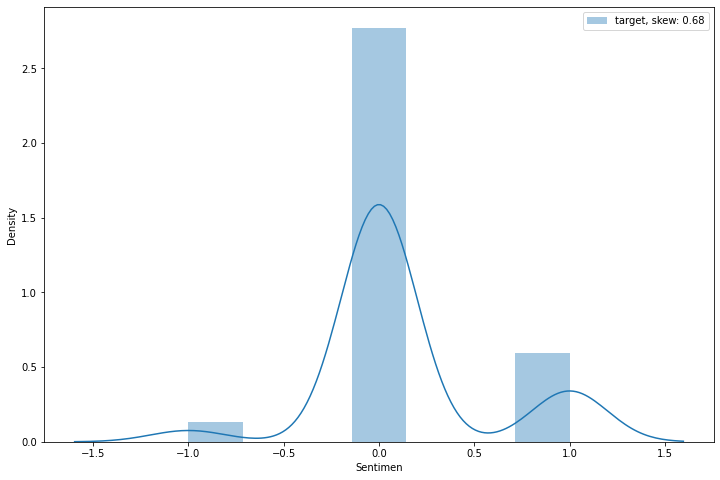

In [36]:
 # Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [37]:
 dataset_label.value_counts()

 0.0    42
 1.0     9
-1.0     2
Name: Sentimen, dtype: int64

In [38]:
 from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
 from sklearn.metrics import recall_score

In [41]:
from sklearn.metrics import f1_score

In [42]:
 from sklearn.metrics import precision_score

In [43]:
 from sklearn.model_selection import train_test_split


In [44]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature,dataset_label, test_size = 0.3, random_state=42)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
 Tfidf_Vectorizer = TfidfVectorizer()


In [47]:
 from sklearn.naive_bayes import MultinomialNB

In [48]:
 from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])


In [49]:
 parameters_nb = {
'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
#'tfidf__use_idf': (True, False),
'model__alpha': (0, 1, 1e-2, 1e-3)
}


In [50]:
 classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [51]:
 classifier_nb.fit(train_x, train_label.ravel())


C:\Users\sanina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\sanina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\sanina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0, 1, 0.01, 0.001),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [52]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.8125


In [53]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.8125


In [54]:
 precision_nb_train = precision_score(train_label, y_pred_nb_train,average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test,average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.7901785714285714


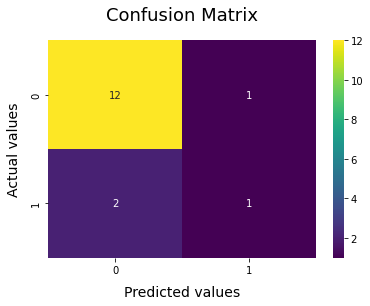

In [56]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap ='viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()


In [57]:
 classifier_nb.best_estimator_


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0))])

In [58]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 0
tfidf__ngram_range: (1, 1)
